In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import xrspatial as xrs
import numpy as np
import xarray as xr
from pathlib import Path
import hvplot.xarray
import subprocess

from create_summary_dataset import create_summary_dataset

### Purpose

The questions to be answered are: 

1) are the xarray calculations and the values calculated by swbstats2 consistent when calculating the *mean annual sum*?
2) is it reasonable that the mean annual sum is nearly the same between the historical precipitation grids for the various CMIP6 models?

### Outcome

1. xarray calculations and swbstats2 are generating consistent values up to the limits of single precision float values.
2. the dataset developer notes that "the [bias] correction works in a way that for each month the multiyear averages of each model should be identical"


In [3]:
cwd = Path.cwd()
datadir = cwd.parent / 'data'
outputdir = cwd.parent / 'test_output'
outputdir.mkdir(parents=True, exist_ok=True)


# these files came from Hovenweep
bcc_filepath = datadir / "historical__gross_precipitation__bcc_csm2-mr__1995-01-01_to_2000-12-31__172_by_155.nc"
cnrm_filepath = datadir / "historical__gross_precipitation__cnrm_esm2-1__1995-01-01_to_2000-12-31__172_by_155.nc"

In [4]:
subprocess.run(["swbstats2", f"--output_prefix={outputdir}/swbstats_output__bcc_", "--annual_statistics", "--netcdf_output", f"{bcc_filepath}"]) 
subprocess.run(["swbstats2", f"--output_prefix={outputdir}/swbstats_output__cnrm_", "--annual_statistics", "--netcdf_output", f"{cnrm_filepath}"]) 

CompletedProcess(args=['swbstats2', '--output_prefix=e:\\projects\\swb_development\\git\\swbstats2-tests\\test_output/swbstats_output__cnrm_', '--annual_statistics', '--netcdf_output', 'e:\\projects\\swb_development\\git\\swbstats2-tests\\data\\historical__gross_precipitation__cnrm_esm2-1__1995-01-01_to_2000-12-31__172_by_155.nc'], returncode=0)

In [5]:
bcc_swbstats_file = outputdir / "swbstats_output__bcc__gross_precipitation__YEARLY_SUM_1995-01-01_to_2000-12-31__172_by_155.nc"
cnrm_swbstats_file = outputdir / "swbstats_output__cnrm__gross_precipitation__YEARLY_SUM_1995-01-01_to_2000-12-31__172_by_155.nc"

bcc_swbstats_annual_sum = xr.open_dataset(bcc_swbstats_file)

In [6]:
# use xarray operations to take the mean of the annual sums from swbstats
bcc_swbstats_mean_annual_sum = bcc_swbstats_annual_sum.mean(dim="time")

In [7]:
bcc_mean_annual_sum = create_summary_dataset(netcdf_filename=bcc_filepath,
                                        scenario_name='historic',
                                        swb_variable_name='gross_precipitation', 
                                        weather_data_name='bcc_csm2-mr', 
                                        summary_basetype='mean_annual',
                                        variable_operation='sum')

cnrm_mean_annual_sum = create_summary_dataset(netcdf_filename=cnrm_filepath,
                                         scenario_name='historic',
                                         swb_variable_name='gross_precipitation', 
                                         weather_data_name='cnrm_esm2-1', 
                                         summary_basetype='mean_annual',
                                         variable_operation='sum')                                        

In [8]:
bcc_mean_annual_sum

<xarray.Dataset> Size: 536kB
Dimensions:              (y: 172, x: 155)
Coordinates:
  * y                    (y) float64 1kB 2.418e+06 2.417e+06 ... 2.247e+06
  * x                    (x) float64 1kB -1.245e+05 -1.235e+05 ... 2.946e+04
    crs                  int32 4B -2147483647
Data variables:
    gross_precipitation  (y, x) float32 107kB 24.71 24.14 24.14 ... 31.25 31.25
    lat                  (y, x) float64 213kB 44.74 44.74 44.74 ... 43.22 43.22
    lon                  (y, x) float64 213kB -97.58 -97.56 ... -95.65 -95.64
Attributes:
    swb_variable_name:         gross_precipitation
    summary_basetype:          mean_annual
    variable_operation:        sum
    weather_data_name:         bcc_csm2-mr
    scenario_name:             historic
    units:                     inches
    original_source_filename:  e:\projects\swb_development\git\swbstats2-test...

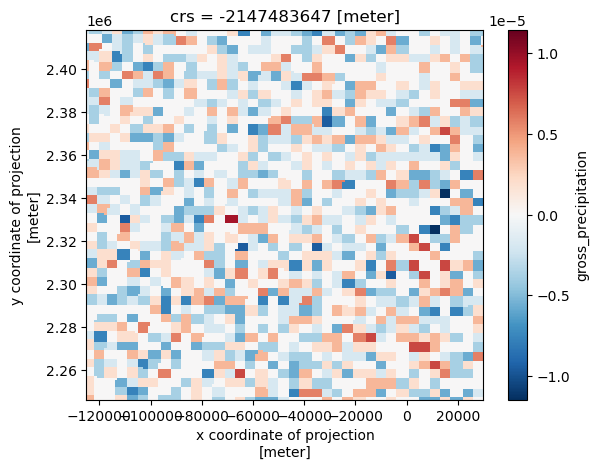

In [9]:
diff_swbstats_bcc = bcc_mean_annual_sum['gross_precipitation'] - bcc_swbstats_mean_annual_sum['gross_precipitation']
diff_swbstats_bcc.plot()

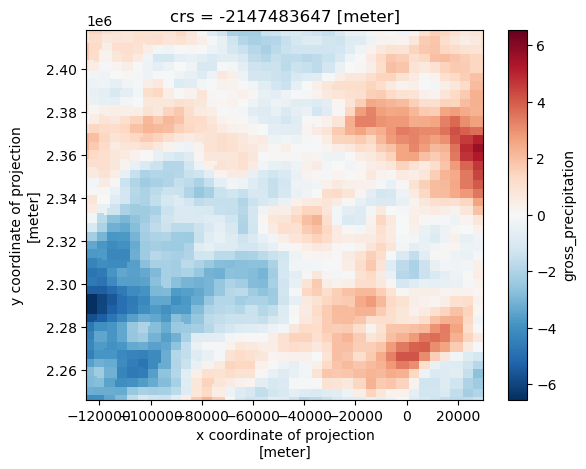

In [10]:
diff_cnrm_bcc = cnrm_mean_annual_sum['gross_precipitation']  - bcc_mean_annual_sum['gross_precipitation'] 
diff_cnrm_bcc.plot()

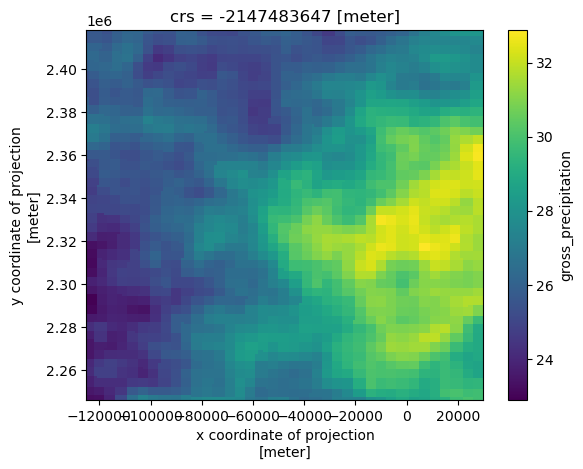

In [11]:
cnrm_mean_annual_sum['gross_precipitation'].plot()

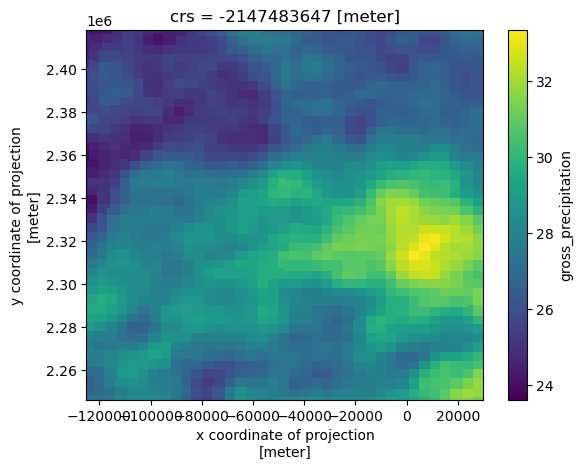

In [13]:
bcc_mean_annual_sum['gross_precipitation'].plot()